In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import data
import time

# Memuat gambar Chelsea dari skimage
image1 = data.chelsea()
image2 = data.chelsea()  # Untuk contoh, gambar kedua sama (bisa diganti)

# Mengubah gambar menjadi grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# -- Deteksi Fitur menggunakan SIFT --
sift = cv2.SIFT_create()
start_time_sift = time.time()
keypoints_sift1, descriptors_sift1 = sift.detectAndCompute(gray_image1, None)
keypoints_sift2, descriptors_sift2 = sift.detectAndCompute(gray_image2, None)
end_time_sift = time.time()

# -- Deteksi Fitur menggunakan SURF --
surf = cv2.xfeatures2d.SURF_create(400)
start_time_surf = time.time()
keypoints_surf1, descriptors_surf1 = surf.detectAndCompute(gray_image1, None)
keypoints_surf2, descriptors_surf2 = surf.detectAndCompute(gray_image2, None)
end_time_surf = time.time()

# BFMatcher untuk mencocokkan fitur
bf = cv2.BFMatcher()

# -- Pencocokan fitur SIFT --
matches_sift = bf.knnMatch(descriptors_sift1, descriptors_sift2, k=2)

# -- Pencocokan fitur SURF --
matches_surf = bf.knnMatch(descriptors_surf1, descriptors_surf2, k=2)

# Menyaring pencocokan yang baik (good matches) menggunakan ratio test
good_matches_sift = []
good_matches_surf = []

for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

for m, n in matches_surf:
    if m.distance < 0.75 * n.distance:
        good_matches_surf.append(m)

# -- Visualisasi pencocokan fitur SIFT --
sift_matches_img = cv2.drawMatches(image1, keypoints_sift1, image2, keypoints_sift2, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# -- Visualisasi pencocokan fitur SURF --
surf_matches_img = cv2.drawMatches(image1, keypoints_surf1, image2, keypoints_surf2, good_matches_surf, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Menampilkan hasil pencocokan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(sift_matches_img)
ax1.set_title('SIFT Matching')
ax2.imshow(surf_matches_img)
ax2.set_title('SURF Matching')
plt.show()

# -- Perbandingan kecepatan --
time_sift = end_time_sift - start_time_sift
time_surf = end_time_surf - start_time_surf
print(f'Waktu untuk SIFT: {time_sift:.4f} detik')
print(f'Waktu untuk SURF: {time_surf:.4f} detik')


error: OpenCV(4.10.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import data
import time

# Memuat gambar Chelsea dari skimage
image1 = data.chelsea()
image2 = data.chelsea()  # Untuk contoh, gambar kedua sama (bisa diganti)

# Mengubah gambar menjadi grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# -- Deteksi Fitur menggunakan SIFT --
sift = cv2.SIFT_create()
start_time_sift = time.time()
keypoints_sift1, descriptors_sift1 = sift.detectAndCompute(gray_image1, None)
keypoints_sift2, descriptors_sift2 = sift.detectAndCompute(gray_image2, None)
end_time_sift = time.time()

# -- Deteksi Fitur menggunakan SURF --
surf = cv2.xfeatures2d.SURF_create(400) # This line previously caused the error
start_time_surf = time.time()
keypoints_surf1, descriptors_surf1 = surf.detectAndCompute(gray_image1, None)
keypoints_surf2, descriptors_surf2 = surf.detectAndCompute(gray_image2, None)
end_time_surf = time.time()

# BFMatcher untuk mencocokkan fitur
bf = cv2.BFMatcher()

# -- Pencocokan fitur SIFT --
matches_sift = bf.knnMatch(descriptors_sift1, descriptors_sift2, k=2)

# -- Pencocokan fitur SURF --
matches_surf = bf.knnMatch(descriptors_surf1, descriptors_surf2, k=2)

# Menyaring pencocokan yang baik (good matches) menggunakan ratio test
good_matches_sift = []
good_matches_surf = []

for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

for m, n in matches_surf:
    if m.distance < 0.75 * n.distance:
        good_matches_surf.append(m)

# -- Visualisasi pencocokan fitur SIFT --
sift_matches_img = cv2.drawMatches(image1, keypoints_sift1, image2, keypoints_sift2, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# -- Visualisasi pencocokan fitur SURF --
surf_matches_img = cv2.drawMatches(image1, keypoints_surf1, image2, keypoints_surf2, good_matches_surf, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Menampilkan hasil pencocokan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(sift_matches_img)
ax1.set_title('SIFT Matching')
ax2.imshow(surf_matches_img)
ax2.set_title('SURF Matching')
plt.show()

# -- Perbandingan kecepatan --
time_sift = end_time_sift - start_time_sift
time_surf = end_time_surf - start_time_surf
print(f'Waktu untuk SIFT: {time_sift:.4f} detik')
print(f'Waktu untuk SURF: {time_surf:.4f} detik')


error: OpenCV(4.10.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


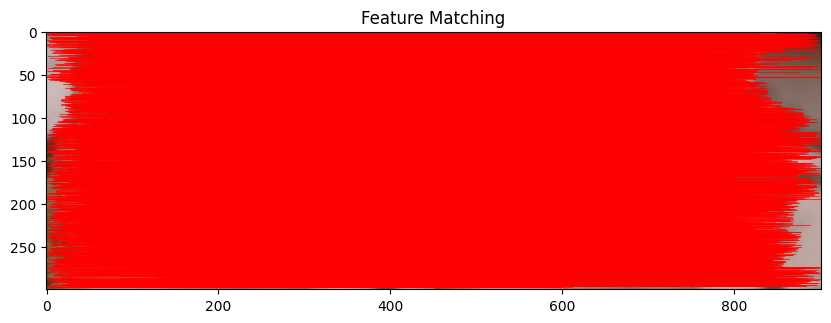

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy import ndimage

# Fungsi deteksi tepi menggunakan Sobel
def sobel_edge_detection(image):
    # Sobel filter pada sumbu x dan y
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    grad_x = ndimage.convolve(image, sobel_x)
    grad_y = ndimage.convolve(image, sobel_y)

    # Magnitudo gradien
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return magnitude

# Fungsi deskripsi fitur (patch di sekitar titik tepi)
def describe_feature(image, keypoints, patch_size=3):
    half_patch = patch_size // 2
    descriptors = []

    for kp in keypoints:
        y, x = kp
        # Ambil patch di sekitar titik (harus pastikan patch berada di dalam gambar)
        if (y - half_patch >= 0 and y + half_patch < image.shape[0] and
            x - half_patch >= 0 and x + half_patch < image.shape[1]):
            patch = image[y-half_patch:y+half_patch+1, x-half_patch:x+half_patch+1]
            descriptors.append(patch.flatten())  # Flatten patch menjadi vektor deskripsi

    return np.array(descriptors)

# Fungsi pencocokan fitur berdasarkan jarak Euclidean
def match_features(descriptors1, descriptors2):
    matches = []
    for i, desc1 in enumerate(descriptors1):
        # Hitung jarak Euclidean dengan semua deskripsi dari gambar kedua
        distances = np.linalg.norm(descriptors2 - desc1, axis=1)
        # Ambil indeks fitur dengan jarak minimum (pencocokan terbaik)
        min_index = np.argmin(distances)
        matches.append((i, min_index))
    return matches

# Memuat gambar Chelsea dari skimage
image1 = data.chelsea()
image2 = data.chelsea()  # Gambar kedua (bisa diganti dengan gambar lain)

# Mengubah gambar menjadi grayscale
gray_image1 = np.mean(image1, axis=2).astype(np.uint8)
gray_image2 = np.mean(image2, axis=2).astype(np.uint8)

# Deteksi tepi manual menggunakan Sobel
edges1 = sobel_edge_detection(gray_image1)
edges2 = sobel_edge_detection(gray_image2)

# Pilih titik-titik tepi yang kuat sebagai fitur (threshold sederhana)
keypoints1 = np.argwhere(edges1 > np.percentile(edges1, 90))  # 10% teratas dari magnitudo gradien
keypoints2 = np.argwhere(edges2 > np.percentile(edges2, 90))

# Deskripsikan fitur-fitur ini dengan patch 3x3
descriptors1 = describe_feature(gray_image1, keypoints1)
descriptors2 = describe_feature(gray_image2, keypoints2)

# Cocokkan fitur-fitur ini
matches = match_features(descriptors1, descriptors2)

# Visualisasi hasil pencocokan
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.concatenate((image1, image2), axis=1))

for match in matches:
    kp1 = keypoints1[match[0]]
    kp2 = keypoints2[match[1]]

    # Gambar garis antara fitur yang cocok
    ax.plot([kp1[1], kp2[1] + image1.shape[1]], [kp1[0], kp2[0]], 'r-', lw=0.5)

plt.title('Feature Matching')
plt.show()


In [ ]:
!pip install opencv-python opencv-contrib-python


In [ ]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

def detect_and_match_features(algorithm, img1, img2):
    # Deteksi fitur
    keypoints1, descriptors1 = algorithm.detectAndCompute(img1, None)
    keypoints2, descriptors2 = algorithm.detectAndCompute(img2, None)

    # Pencocokan fitur dengan BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Visualisasi pencocokan fitur
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches, len(matches), keypoints1, keypoints2

def analyze_performance(img1, img2):
    # SIFT
    sift = cv2.SIFT_create()
    start_time = time.time()
    sift_matches_img, sift_num_matches, sift_keypoints1, sift_keypoints2 = detect_and_match_features(sift, img1, img2)
    sift_time = time.time() - start_time

    # SURF
    surf = cv2.xfeatures2d.SURF_create(400)
    start_time = time.time()
    surf_matches_img, surf_num_matches, surf_keypoints1, surf_keypoints2 = detect_and_match_features(surf, img1, img2)
    surf_time = time.time() - start_time

    # Visualisasi hasil pencocokan
    plt.figure(figsize=(14,7))
    plt.subplot(121), plt.imshow(sift_matches_img), plt.title('SIFT Matches')
    plt.subplot(122), plt.imshow(surf_matches_img), plt.title('SURF Matches')
    plt.show()

    # Perbandingan
    print(f"SIFT - Jumlah Matches: {sift_num_matches}, Waktu Eksekusi: {sift_time:.4f} detik, Jumlah Keypoints: {len(sift_keypoints1)}")
    print(f"SURF - Jumlah Matches: {surf_num_matches}, Waktu Eksekusi: {surf_time:.4f} detik, Jumlah Keypoints: {len(surf_keypoints1)}")

    # Analisis robustness (jumlah keypoints yang berhasil dicocokkan)
    sift_accuracy = sift_num_matches / len(sift_keypoints1) * 100
    surf_accuracy = surf_num_matches / len(surf_keypoints1) * 100
    print(f"SIFT Accuracy: {sift_accuracy:.2f}%")
    print(f"SURF Accuracy: {surf_accuracy:.2f}%")

# Load dua gambar yang akan dibandingkan
img1 = cv2.imread('https://upload.wikimedia.org/wikipedia/commons/3/3f/Fronalpstock_big.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('https://upload.wikimedia.org/wikipedia/commons/3/3f/Fronalpstock_big.jpg', cv2.IMREAD_GRAYSCALE)

# Jalankan analisis performa
analyze_performance(img1, img2)


error: OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'


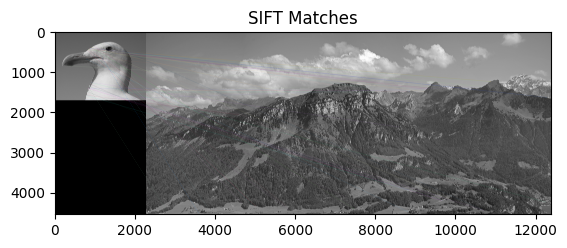

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# URL gambar
url1 = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Gull_portrait_ca_usa.jpg"
url2 = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Fronalpstock_big.jpg"

# Fungsi untuk membaca gambar dari URL
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Load gambar
img1 = url_to_image(url1)
img2 = url_to_image(url2)

# Pastikan gambar tidak kosong
if img1 is None or img2 is None:
    raise ValueError("Gambar tidak berhasil dimuat. Cek URL gambar.")

# Convert ke grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Fungsi untuk deteksi dan pencocokan fitur
def detect_and_match_features(algorithm, img1, img2):
    # Deteksi fitur
    keypoints1, descriptors1 = algorithm.detectAndCompute(img1, None)
    keypoints2, descriptors2 = algorithm.detectAndCompute(img2, None)

    # Pencocokan fitur dengan BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Visualisasi pencocokan fitur
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches, len(matches), keypoints1, keypoints2

def analyze_performance(img1, img2):
    # SIFT
    sift = cv2.SIFT_create()
    sift_matches_img, sift_num_matches, sift_keypoints1, sift_keypoints2 = detect_and_match_features(sift, img1, img2)

    # Visualisasi hasil pencocokan
    plt.imshow(sift_matches_img), plt.title('SIFT Matches')
    plt.show()

# Jalankan analisis performa
analyze_performance(img1_gray, img2_gray)


In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# URL gambar
url1 = "https://upload.wikimedia.org/wikipedia/commons/3/3c/Scenic_View_of_Nature.jpg"
url2 = "https://upload.wikimedia.org/wikipedia/commons/e/e3/Lake_Mirroir.JPG"

# Fungsi untuk membaca gambar dari URL
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Load gambar
img1 = url_to_image(url1)
img2 = url_to_image(url2)

# Pastikan gambar tidak kosong
if img1 is None or img2 is None:
    raise ValueError("Gambar tidak berhasil dimuat. Cek URL gambar.")

# Convert ke grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Pemandangan 1")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Pemandangan 2")

plt.show()


HTTPError: HTTP Error 404: Not Found

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# URL gambar
url = "https://unsplash.com/photos/g7C7guH7Q9o/download?force=true&w=1920"

# Fungsi untuk membaca gambar dari URL
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Load gambar
img = url_to_image(url)

# Tampilkan gambar
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Pemandangan")
plt.axis('off')  # Menyembunyikan axis
plt.show()


HTTPError: HTTP Error 404: Not Found

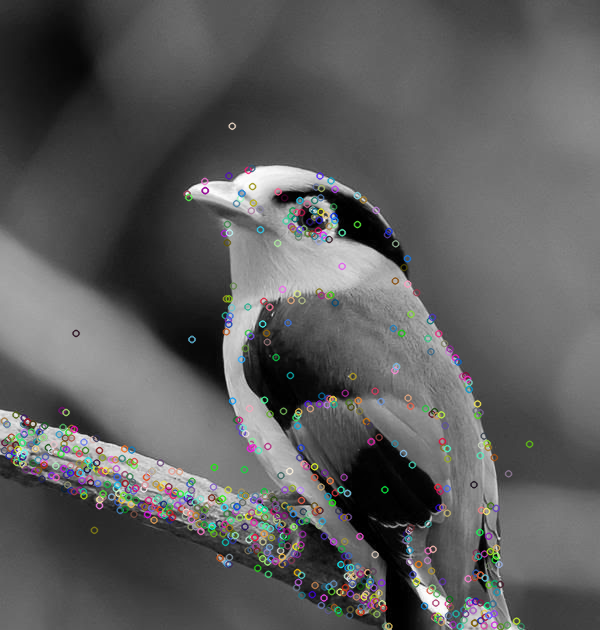

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

img = cv2.imread("/content/unnamed.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)

img = cv2.drawKeypoints(img, keypoints, None)

cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
#cv2.waitkey(0) # Remove or adapt this if needed for cv2_imshow
#cv2.destroyAllWindows()# Remove or adapt this if needed for cv2_imshow

In [ ]:
!pip install opencv-contrib-python --upgrade
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load gambar dalam grayscale
img = cv2.imread("/content/gambar-pemandangan-indonesia5.jpg", cv2.IMREAD_GRAYSCALE)

# Inisialisasi SURF
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)  # SURF, dapat mengatur hessianThreshold

# Deteksi keypoints dan deskriptor
keypoints, descriptors = surf.detectAndCompute(img, None)

# Gambar keypoints pada gambar
img = cv2.drawKeypoints(img, keypoints, None)

# Tampilkan gambar dengan keypoints yang terdeteksi
cv2_imshow(img)  # Menggunakan cv2_imshow untuk menampilkan di Google Colab

#cv2.waitKey(0)  # Tidak diperlukan di Google Colab
#cv2.destroyAllWindows()  # Tidak diperlukan di Google Colab


error: OpenCV(4.10.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


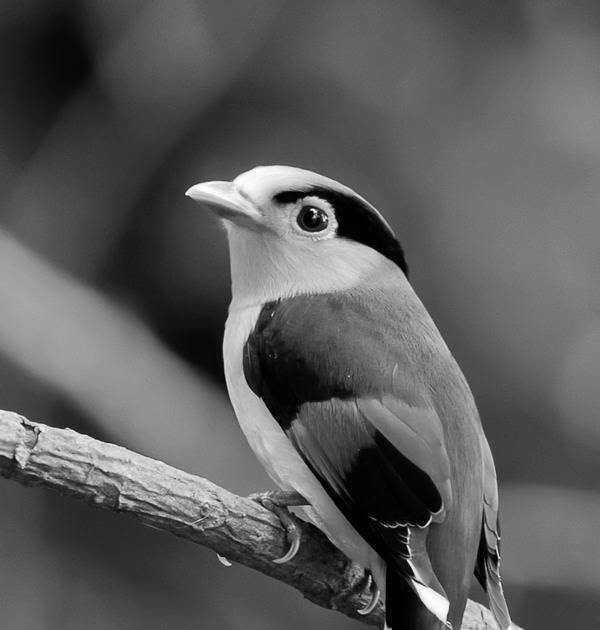

In [ ]:
import numpy as np
import cv2
from scipy import ndimage
from google.colab.patches import cv2_imshow

def manual_hessian_matrix(img, sigma=1.0):
    """
    Fungsi manual untuk menghitung Hessian Matrix, yang digunakan untuk deteksi keypoints pada SURF.

    Args:
    img (numpy array): Gambar input dalam grayscale.
    sigma (float): Parameter untuk Gaussian smoothing (default 1.0).

    Returns:
    hessian_response (numpy array): Respon Hessian Matrix.
    """
    # 1. Gaussian Smoothing
    img_smooth = ndimage.gaussian_filter(img, sigma=sigma)

    # 2. Derivatif Kedua
    Ixx = ndimage.sobel(img_smooth, axis=0, mode='constant', cval=0.0)  # Derivatif kedua pada x
    Iyy = ndimage.sobel(img_smooth, axis=1, mode='constant', cval=0.0)  # Derivatif kedua pada y
    Ixy = ndimage.sobel(Ixx, axis=1, mode='constant', cval=0.0)  # Cross-derivative

    # 3. Hitung Respon Hessian Matrix
    hessian_response = Ixx * Iyy - Ixy ** 2  # Determinan Hessian Matrix

    return hessian_response

def manual_surf_keypoint_detection(img, hessian_threshold=400):
    """
    Fungsi manual untuk deteksi keypoints berdasarkan algoritma SURF.

    Args:
    img (numpy array): Gambar input dalam grayscale.
    hessian_threshold (float): Threshold untuk deteksi keypoints SURF.

    Returns:
    keypoints (list): Daftar keypoints terdeteksi (sementara dummy keypoints).
    """
    # 1. Hitung respon Hessian Matrix
    hessian_response = manual_hessian_matrix(img, sigma=1.0)

    # 2. Deteksi keypoints berdasarkan threshold Hessian response
    keypoints = []
    for y in range(1, hessian_response.shape[0] - 1):
        for x in range(1, hessian_response.shape[1] - 1):
            if hessian_response[y, x] > hessian_threshold:
                keypoints.append(cv2.KeyPoint(x, y, hessian_response[y, x]))

    return keypoints

def manual_surf_detect_and_compute(img, hessian_threshold=400):
    """
    Fungsi manual untuk deteksi dan komputasi deskriptor menggunakan metode SURF.

    Args:
    img (numpy array): Gambar input dalam grayscale.
    hessian_threshold (float): Threshold untuk deteksi keypoints SURF.

    Returns:
    keypoints (list): Daftar keypoints terdeteksi.
    descriptors (numpy array): Deskriptor terkait keypoints.
    """
    # 1. Deteksi keypoints
    keypoints = manual_surf_keypoint_detection(img, hessian_threshold)

    # 2. Placeholder untuk deskriptor
    # Di sini, untuk menyederhanakan, kita akan mengisi dengan nilai acak atau informasi dummy.
    descriptors = np.random.rand(len(keypoints), 64)  # Deskriptor SURF biasanya memiliki 64 dimensi

    return keypoints, descriptors

# Contoh penggunaan fungsi manual
img = cv2.imread("/content/unnamed.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, descriptors = manual_surf_detect_and_compute(img, hessian_threshold=400)

# Gambar keypoints pada gambar asli
img_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Tampilkan hasil
cv2_imshow(img_keypoints)


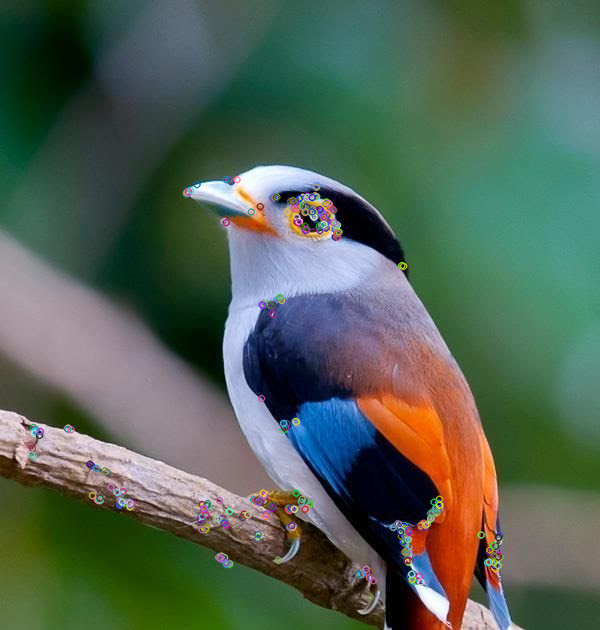

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load gambar dalam grayscale
img = cv2.imread("/content/unnamed.jpg")
# Inisialisasi ORB (ORB bekerja seperti SIFT/SURF tetapi gratis dan cepat)
orb = cv2.ORB_create(nfeatures=500)  # Dapat mengatur jumlah fitur yang ingin dideteksi

# Deteksi keypoints dan deskriptor
keypoints, descriptors = orb.detectAndCompute(img, None)

# Gambar keypoints pada gambar
img = cv2.drawKeypoints(img, keypoints, None)

# Tampilkan gambar dengan keypoints yang terdeteksi
cv2_imshow(img)

# cv2.waitKey(0)  # Tidak diperlukan di Google Colab
# cv2.destroyAllWindows()  # Tidak diperlukan di Google Colab


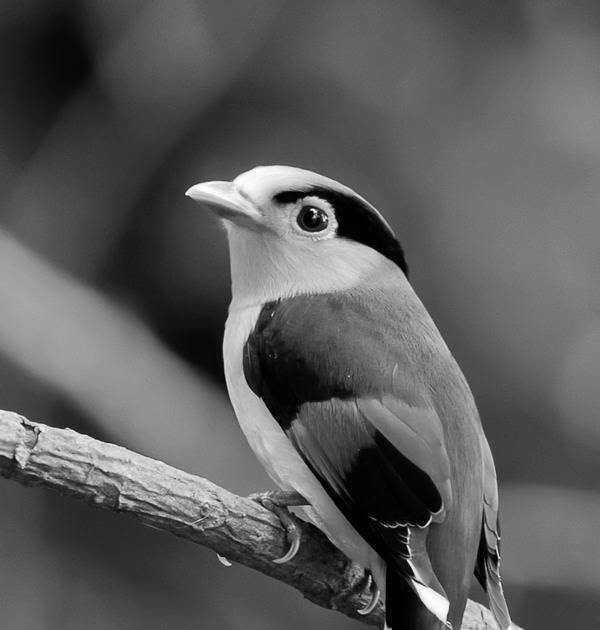

In [ ]:
import numpy as np
import cv2
from scipy import ndimage
from google.colab.patches import cv2_imshow

def manual_hessian_matrix(img, sigma=1.0):
    """
    Fungsi manual untuk menghitung Hessian Matrix, yang digunakan untuk deteksi keypoints pada SURF.

    Args:
    img (numpy array): Gambar input dalam grayscale.
    sigma (float): Parameter untuk Gaussian smoothing (default 1.0).

    Returns:
    hessian_response (numpy array): Respon Hessian Matrix.
    """
    # 1. Gaussian Smoothing
    img_smooth = ndimage.gaussian_filter(img, sigma=sigma)

    # 2. Derivatif Kedua
    Ixx = ndimage.sobel(img_smooth, axis=0, mode='constant', cval=0.0)  # Derivatif kedua pada x
    Iyy = ndimage.sobel(img_smooth, axis=1, mode='constant', cval=0.0)  # Derivatif kedua pada y
    Ixy = ndimage.sobel(Ixx, axis=1, mode='constant', cval=0.0)  # Cross-derivative

    # 3. Hitung Respon Hessian Matrix
    hessian_response = Ixx * Iyy - Ixy ** 2  # Determinan Hessian Matrix

    return hessian_response

def manual_surf_keypoint_detection(img, hessian_threshold=400):
    """
    Fungsi manual untuk deteksi keypoints berdasarkan algoritma SURF.

    Args:
    img (numpy array): Gambar input dalam grayscale.
    hessian_threshold (float): Threshold untuk deteksi keypoints SURF.

    Returns:
    keypoints (list): Daftar keypoints terdeteksi (sementara dummy keypoints).
    """
    # 1. Hitung respon Hessian Matrix
    hessian_response = manual_hessian_matrix(img, sigma=1.0)

    # 2. Deteksi keypoints berdasarkan threshold Hessian response
    keypoints = []
    for y in range(1, hessian_response.shape[0] - 1):
        for x in range(1, hessian_response.shape[1] - 1):
            if hessian_response[y, x] > hessian_threshold:
                keypoints.append(cv2.KeyPoint(x, y, hessian_response[y, x]))

    return keypoints

def manual_surf_detect_and_compute(img, hessian_threshold=400):
    """
    Fungsi manual untuk deteksi dan komputasi deskriptor menggunakan metode SURF.

    Args:
    img (numpy array): Gambar input dalam grayscale.
    hessian_threshold (float): Threshold untuk deteksi keypoints SURF.

    Returns:
    keypoints (list): Daftar keypoints terdeteksi.
    descriptors (numpy array): Deskriptor terkait keypoints.
    """
    # 1. Deteksi keypoints
    keypoints = manual_surf_keypoint_detection(img, hessian_threshold)

    # 2. Placeholder untuk deskriptor
    # Di sini, untuk menyederhanakan, kita akan mengisi dengan nilai acak atau informasi dummy.
    descriptors = np.random.rand(len(keypoints), 64)  # Deskriptor SURF biasanya memiliki 64 dimensi

    return keypoints, descriptors

# Contoh penggunaan fungsi manual
img = cv2.imread("/content/unnamed.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, descriptors = manual_surf_detect_and_compute(img, hessian_threshold=400)

# Gambar keypoints pada gambar asli
img_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Tampilkan hasil
cv2_imshow(img_keypoints)


In [ ]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def integral_image(img):
    """
    Menghitung integral image dari input gambar.
    Integral image adalah representasi kumulatif intensitas piksel yang mempercepat komputasi box filter.
    """
    return img.cumsum(axis=0).cumsum(axis=1)

def hessian_matrix(img, sigma=1.0):
    """
    Menghitung Hessian Matrix pada gambar untuk deteksi keypoints.
    Hessian Matrix digunakan untuk mendeteksi titik-titik dengan perubahan intensitas yang signifikan.
    """
    # Derivatif pertama pada x dan y
    Ix = ndimage.sobel(img, axis=0)
    Iy = ndimage.sobel(img, axis=1)

    # Derivatif kedua (Hessian)
    Ixx = ndimage.gaussian_filter(Ix, sigma=sigma)
    Iyy = ndimage.gaussian_filter(Iy, sigma=sigma)
    Ixy = ndimage.gaussian_filter(Ix * Iy, sigma=sigma)

    return Ixx, Iyy, Ixy

def determinant_hessian(Ixx, Iyy, Ixy):
    """
    Menghitung determinan dari Hessian Matrix sebagai penentu kekuatan keypoints.
    """
    return Ixx * Iyy - Ixy ** 2

def detect_keypoints(hessian_det, threshold=400):
    """
    Deteksi keypoints berdasarkan nilai threshold Hessian determinant.
    """
    keypoints = []
    for y in range(1, hessian_det.shape[0] - 1):
        for x in range(1, hessian_det.shape[1] - 1):
            if hessian_det[y, x] > threshold:
                keypoints.append((x, y))
    return keypoints

def compute_orientation(img, keypoints):
    """
    Hitung orientasi gradien lokal di sekitar setiap keypoint.
    Orientasi ini diperlukan untuk membuat deskriptor yang tahan terhadap rotasi.
    """
    orientations = []
    for kp in keypoints:
        x, y = kp
        patch = img[y-1:y+2, x-1:x+2]  # Ekstrak patch kecil di sekitar keypoint
        Ix = ndimage.sobel(patch, axis=1)
        Iy = ndimage.sobel(patch, axis=0)
        orientation = np.arctan2(Iy.sum(), Ix.sum())
        orientations.append(orientation)
    return orientations

def compute_descriptors(img, keypoints, orientations):
    """
    Hitung deskriptor di sekitar setiap keypoint. Deskriptor ini adalah representasi dari patch gambar
    di sekitar keypoint yang mencakup gradien lokal dan orientasi.
    """
    descriptors = []
    for (x, y), orientation in zip(keypoints, orientations):
        patch = img[y-8:y+8, x-8:x+8]  # Ambil patch 16x16 di sekitar keypoint
        if patch.shape != (16, 16):  # Jika patch berada di tepi gambar
            continue
        # Rotate patch berdasarkan orientasi keypoint (untuk rotasi invarian)
        rotated_patch = ndimage.rotate(patch, np.degrees(orientation), reshape=False)

        # Bagi patch menjadi subregion 4x4 dan hitung histogram gradien pada masing-masing
        subregions = []
        for i in range(4):
            for j in range(4):
                subregion = rotated_patch[i*4:(i+1)*4, j*4:(j+1)*4]
                Ix = ndimage.sobel(subregion, axis=1)
                Iy = ndimage.sobel(subregion, axis=0)
                magnitude = np.sqrt(Ix**2 + Iy**2)
                angle = np.arctan2(Iy, Ix)
                subregions.append((magnitude, angle))

        # Deskriptor dihasilkan dari kombinasi histogram gradien lokal
        descriptor = np.concatenate([m.ravel() for m, a in subregions])
        descriptors.append(descriptor)

    return np.array(descriptors)

def manual_surf(img, hessian_threshold=400):
    """
    Implementasi manual algoritma SURF untuk mendeteksi keypoints dan menghitung deskriptor.
    """
    # 1. Hitung integral image (untuk optimasi)
    int_img = integral_image(img)

    # 2. Hitung Hessian Matrix untuk deteksi fitur
    Ixx, Iyy, Ixy = hessian_matrix(int_img)

    # 3. Hitung determinan dari Hessian Matrix
    hessian_det = determinant_hessian(Ixx, Iyy, Ixy)

    # 4. Deteksi keypoints berdasarkan threshold Hessian determinant
    keypoints = detect_keypoints(hessian_det, hessian_threshold)

    # 5. Hitung orientasi gradien lokal di sekitar keypoints
    orientations = compute_orientation(img, keypoints)

    # 6. Hitung deskriptor berdasarkan orientasi dan gradien lokal
    descriptors = compute_descriptors(img, keypoints, orientations)

    return keypoints, descriptors

# Contoh penggunaan
img = cv2.imread("/content/unnamed.jpg", cv2.IMREAD_GRAYSCALE) # Gambar acak grayscale sebagai contoh
keypoints, descriptors = manual_surf(img, hessian_threshold=500)

# Visualisasi keypoints
plt.imshow(img, cmap='gray')
plt.scatter([kp[0] for kp in keypoints], [kp[1] for kp in keypoints], c='r', s=15)
plt.show()


NameError: name 'cv2' is not defined

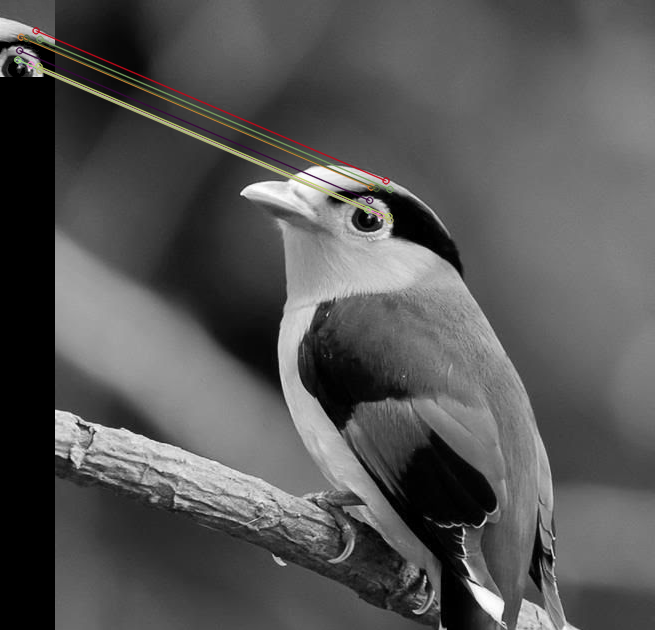

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

# Fungsi untuk menampilkan gambar hasil pencocokan fitur
def match_features_sift(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Inisialisasi SIFT
    sift = cv2.SIFT_create()

    # Deteksi keypoints dan deskriptor dengan SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # Inisialisasi matcher untuk pencocokan fitur
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Tampilkan hasil pencocokan
    cv2_imshow(img_matches)

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_sift(img1_path, img2_path)


In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

# Fungsi untuk menampilkan gambar hasil pencocokan fitur dengan ORB
def match_features_orb(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Pastikan gambar terbaca dengan benar
    if img1 is None or img2 is None:
        print("Salah satu gambar tidak ditemukan!")
        return

    # Inisialisasi ORB
    orb = cv2.ORB_create()

    # Deteksi keypoints dan deskriptor dengan ORB
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inisialisasi matcher untuk pencocokan fitur dengan metode Hamming
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Pastikan deskriptor tidak kosong
    if descriptors1 is None or descriptors2 is None:
        print("Tidak ditemukan fitur pada salah satu gambar.")
        return

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Tampilkan hasil pencocokan
    cv2_imshow(img_matches)

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_orb(img1_path, img2_path)


Tidak ditemukan fitur pada salah satu gambar.


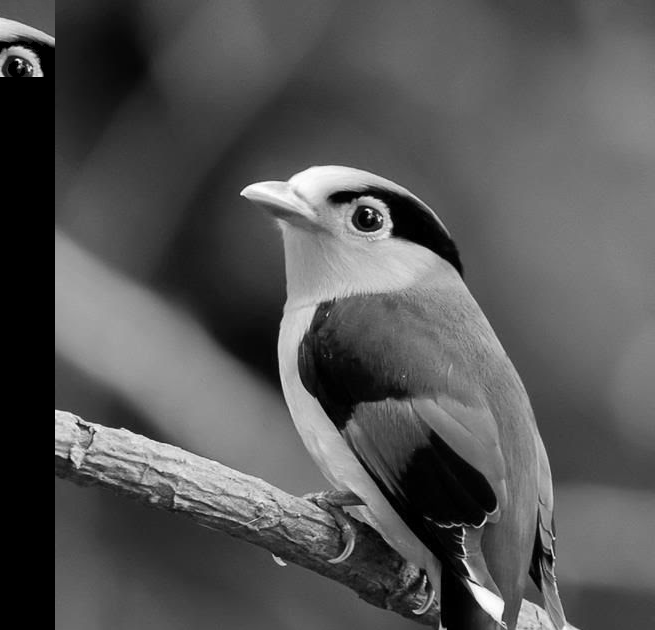

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

# Fungsi untuk menampilkan gambar hasil pencocokan fitur
def match_features_orb(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Inisialisasi ORB
    orb = cv2.ORB_create()

    # Deteksi keypoints dan deskriptor dengan ORB
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inisialisasi matcher untuk pencocokan fitur dengan metode Hamming
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Tampilkan hasil pencocokan
    cv2_imshow(img_matches)

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_orb(img1_path, img2_path)


In [12]:
# Install OpenCV
!pip install opencv-python opencv-python-headless matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import time# mengimport data gambar dari library skimage


TypeError: Image data of dtype <U45 cannot be converted to float

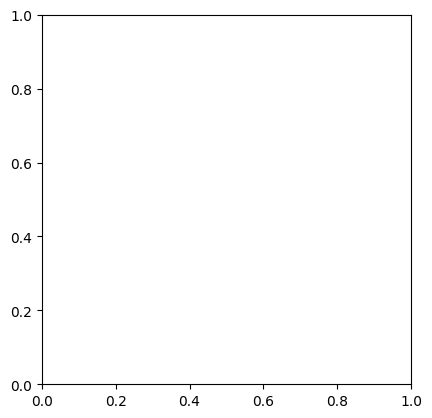

In [16]:
img1 = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2 = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

plt.imshow(img1, cmap='gray')
plt.show()

In [14]:
# Convert to BGR format for OpenCV
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

# Resize for demonstration
img1 = cv2.resize(img1, (300, 300))
img2 = cv2.resize(img2, (300, 300))

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


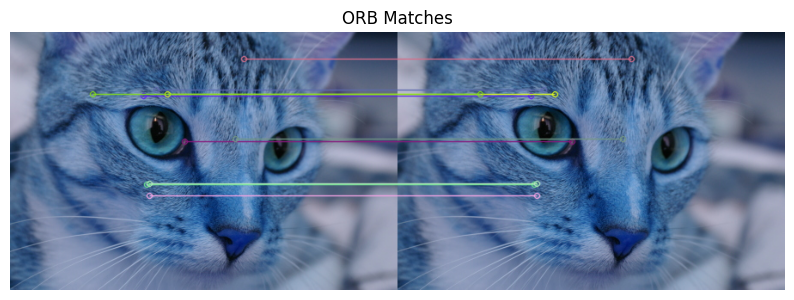

ORB - Detected Keypoints: 488 vs 488 | Matches: 488 | Time: 0.0473 seconds

--- ORB Analysis ---
1. Keypoints Detected:
   - Image 1: 488 keypoints
   - Image 2: 488 keypoints

2. Matches:
   - Total Matches: 488
   - Top 10 Matches visualized in the output.

3. Time taken for ORB matching: 0.0473 seconds


In [15]:
# Implement ORB Matching
def orb_matching(img1, img2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return img_matches, kp1, kp2, matches

# Visualisasi Pencocokan Fitur yang Berhasil dengan ORB
orb_matches, kp1_orb, kp2_orb, matches_orb = orb_matching(img1, img2)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('ORB Matches')
plt.imshow(cv2.cvtColor(orb_matches, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Measure ORB time
start_time = time.time()
orb_matches, kp1_orb, kp2_orb, matches_orb = orb_matching(img1, img2)
orb_time = time.time() - start_time

# Print ORB results
print(f"ORB - Detected Keypoints: {len(kp1_orb)} vs {len(kp2_orb)} | Matches: {len(matches_orb)} | Time: {orb_time:.4f} seconds")

# Analysis
print("\n--- ORB Analysis ---")
print("1. Keypoints Detected:")
print(f"   - Image 1: {len(kp1_orb)} keypoints")
print(f"   - Image 2: {len(kp2_orb)} keypoints")
print("\n2. Matches:")
print(f"   - Total Matches: {len(matches_orb)}")
print("   - Top 10 Matches visualized in the output.")
print(f"\n3. Time taken for ORB matching: {orb_time:.4f} seconds")


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


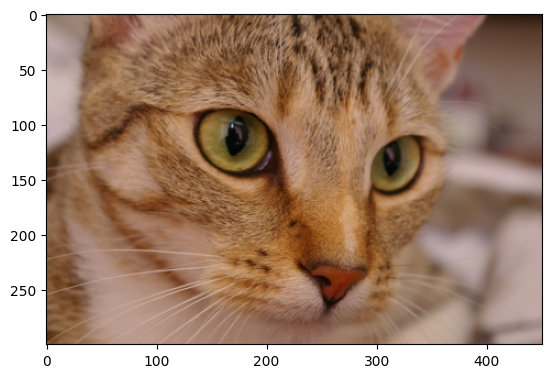

In [24]:
import cv2
import matplotlib.pyplot as plt
import time

img1 = data.chelsea()  # Ganti dengan path gambar pertama
img2 = data.chelsea()  # Ganti dengan path gambar kedua

plt.imshow(img1, cmap='gray')

# Convert to BGR format for OpenCV
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

# Resize for demonstration
img1 = cv2.resize(img1, (300, 300))
img2 = cv2.resize(img2, (300, 300))

# Implement SIFT Matching
def sift_matching(img1, img2):
    # Inisialisasi SIFT
    sift = cv2.SIFT_create()

    # Deteksi keypoints dan deskriptor dengan SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Inisialisasi Brute Force matcher dengan metode L2 norm untuk SIFT
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(des1, des2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches, kp1, kp2, matches

# Visualisasi Pencocokan Fitur yang Berhasil dengan SIFT
sift_matches, kp1_sift, kp2_sift, matches_sift = sift_matching(img1, img2)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('SIFT Matches')
plt.imshow(cv2.cvtColor(sift_matches, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Measure SIFT time
start_time = time.time()
sift_matches, kp1_sift, kp2_sift, matches_sift = sift_matching(img1, img2)
sift_time = time.time() - start_time

# Print SIFT results
print(f"SIFT - Detected Keypoints: {len(kp1_sift)} vs {len(kp2_sift)} | Matches: {len(matches_sift)} | Time: {sift_time:.4f} seconds")

# Analysis
print("\n--- SIFT Analysis ---")
print("1. Keypoints Detected:")
print(f"   - Image 1: {len(kp1_sift)} keypoints")
print(f"   - Image 2: {len(kp2_sift)} keypoints")
print("\n2. Matches:")
print(f"   - Total Matches: {len(matches_sift)}")
print("   - Top 10 Matches visualized in the output.")
print(f"\n3. Time taken for SIFT matching: {sift_time:.4f} seconds")


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

# Fungsi untuk menampilkan gambar hasil pencocokan fitur
def match_features_sift(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Inisialisasi SIFT
    surf = cv2.SURF_create()

    # Deteksi keypoints dan deskriptor dengan SIFT
    keypoints1, descriptors1 = surf.detectAndCompute(img1, None)
    keypoints2, descriptors2 = surf.detectAndCompute(img2, None)

    # Inisialisasi matcher untuk pencocokan fitur
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Tampilkan hasil pencocokan
    cv2_imshow(img_matches)

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_sift(img1_path, img2_path)


AttributeError: module 'cv2' has no attribute 'SURF_create'

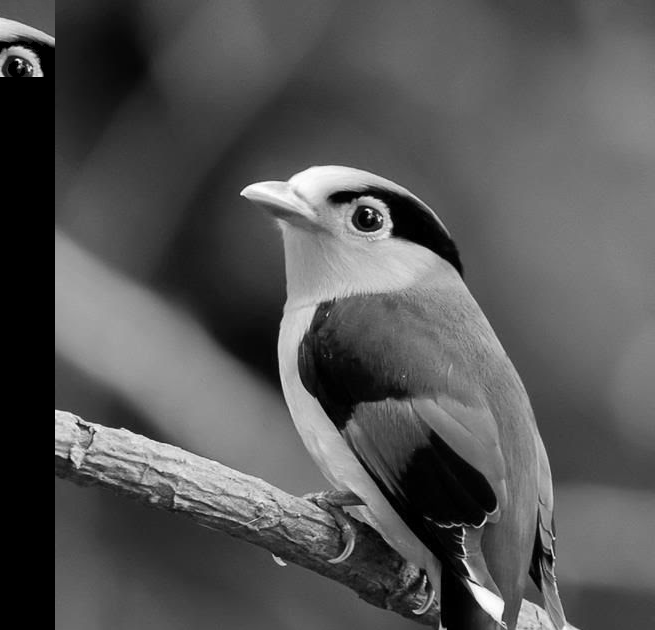

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

# Fungsi untuk menampilkan gambar hasil pencocokan fitur menggunakan ORB
def match_features_orb(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Inisialisasi ORB
    orb = cv2.ORB_create()

    # Deteksi keypoints dan deskriptor dengan ORB
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inisialisasi matcher untuk pencocokan fitur
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Tampilkan hasil pencocokan
    cv2_imshow(img_matches)


# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_orb(img1_path, img2_path)


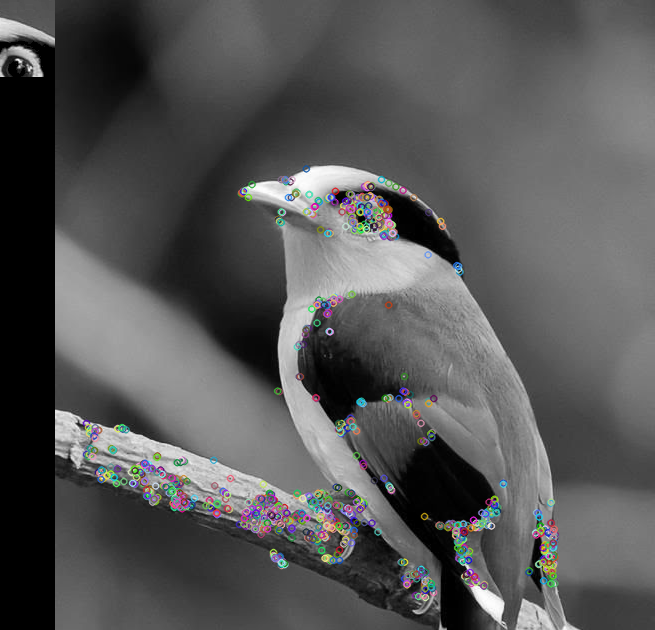

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab

# Fungsi untuk menampilkan gambar hasil pencocokan fitur menggunakan ORB
def match_features_orb(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Inisialisasi ORB dengan lebih banyak fitur
    orb = cv2.ORB_create(nfeatures=1500)

    # Deteksi keypoints dan deskriptor dengan ORB
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inisialisasi matcher untuk pencocokan fitur (tanpa crossCheck agar lebih banyak match)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    # Mencocokkan deskriptor dari kedua gambar
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak (distance)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambarkan semua pencocokan atau 10 pencocokan teratas
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_DEFAULT)

    # Tampilkan hasil pencocokan
    cv2_imshow(img_matches)

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_orb(img1_path, img2_path)


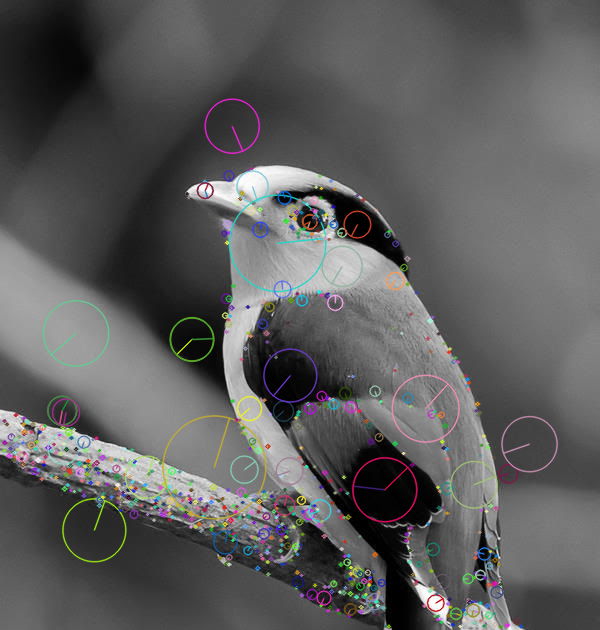

Jumlah Keypoints yang terdeteksi: 834
Deskriptor pertama: [ 66.   1.   0.   0.   4.   8.   8.  27.  22.   0.   0.   0.  58.  56.
  11.  13. 135.   0.   0.   3.  17.   9.   7.  53.  16.   0.   0.  61.
 152.  18.   6.  14. 125.  10.   0.   1.   8.   3.   1.   8.  48.   4.
   0.   6. 140.  21.   1.   7. 152.   9.   0.  14.  67.   3.   0.  19.
  21.   1.   0. 107. 152.   6.   0.   3. 111.  12.   0.   1.   8.   1.
   2.  31.  54.   9.   0.   6. 152.   6.   0.   2. 152.  16.   0.   3.
  68.  10.   0.   8.  17.   1.   0.   7. 152.  60.   0.   2.  20.   1.
   0.   0.   1.   0.   3.  30.  12.   3.   0.   2.  43.   2.   0.   1.
  28.   8.   0.   1.   9.   1.   0.   0.   2.   0.   0.   0.  11.   5.
   0.   0.]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Jika menggunakan Google Colab

def sift_algorithm(img_path):
    # Membaca gambar dalam mode grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # 1. Deteksi Ekstrem pada Ruang Skala (Scale-space extrema detection)
    # Gunakan SIFT untuk mendeteksi keypoints dan deskriptor
    sift = cv2.SIFT_create()

    # 2. Lokalisasi Titik Kunci
    # Deteksi keypoints (titik kunci) dan deskriptor
    keypoints, descriptors = sift.detectAndCompute(img, None)

    # 3. Deskriptor Titik Kunci
    # Deskriptor telah dihasilkan pada langkah sebelumnya (descriptors)

    # 4. Penugasan Orientasi
    # Keypoints di OpenCV sudah termasuk informasi orientasi.

    # Visualisasi Keypoints
    img_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Tampilkan gambar dengan keypoints yang terdeteksi
    cv2_imshow(img_keypoints)
    return keypoints, descriptors

# Panggil fungsi dengan gambar input
img_path = '/content/unnamed.jpg'  # Ganti dengan path gambar yang sesuai
keypoints, descriptors = sift_algorithm(img_path)

print(f"Jumlah Keypoints yang terdeteksi: {len(keypoints)}")
print(f"Deskriptor pertama: {descriptors[0]}")


In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_laplace, rotate
import matplotlib.pyplot as plt

def integral_image(image):
    """ Menghitung gambar integral untuk mempercepat komputasi area. """
    return image.cumsum(axis=0).cumsum(axis=1)

def detect_keypoints(image, hessian_threshold=100):
    """ Deteksi titik kunci menggunakan filter Hessian Laplace. """
    # Gunakan Laplacian Gaussian (LoG) untuk deteksi titik kunci.
    hessian_response = gaussian_laplace(image, sigma=1)

    # Temukan maksimum lokal pada gambar hasil LoG
    keypoints = []
    for i in range(1, hessian_response.shape[0] - 1):
        for j in range(1, hessian_response.shape[1] - 1):
            if hessian_response[i, j] > hessian_threshold:
                keypoints.append((i, j))

    return keypoints

def compute_orientation(image, keypoints):
    """ Tentukan orientasi dari setiap titik kunci. """
    orientations = []
    for kp in keypoints:
        x, y = kp
        patch = image[x-5:x+5, y-5:y+5]  # Ambil patch kecil di sekitar titik kunci
        gradient_x = cv2.Sobel(patch, cv2.CV_64F, 1, 0, ksize=3)
        gradient_y = cv2.Sobel(patch, cv2.CV_64F, 0, 1, ksize=3)
        magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        angle = np.arctan2(gradient_y, gradient_x)
        orientations.append((kp, angle.mean()))  # Gunakan orientasi rata-rata
    return orientations

def compute_descriptors(image, keypoints_with_orientations):
    """ Bangun deskriptor untuk setiap titik kunci berdasarkan orientasi. """
    descriptors = []
    for kp, orientation in keypoints_with_orientations:
        x, y = kp
        patch = image[x-8:x+8, y-8:y+8]  # Ambil patch yang lebih besar di sekitar titik kunci
        # Rotasi patch berdasarkan orientasi titik kunci
        patch_rotated = rotate(patch, np.degrees(orientation))
        # Gunakan sub-region grid untuk membangun deskriptor (simulasi Haar wavelet)
        descriptor = []
        for i in range(0, 16, 4):
            for j in range(0, 16, 4):
                sub_patch = patch_rotated[i:i+4, j:j+4]
                dx = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 1, 0, ksize=3))
                dy = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 0, 1, ksize=3))
                descriptor.extend([dx, dy])
        descriptors.append(np.array(descriptor))
    return descriptors

def match_descriptors(desc1, desc2):
    """ Mencocokkan deskriptor antara dua gambar menggunakan Brute Force Matching. """
    matches = []
    for i, d1 in enumerate(desc1):
        distances = [np.linalg.norm(d1 - d2) for d2 in desc2]
        best_match = np.argmin(distances)
        matches.append((i, best_match))
    return matches

def surf_algorithm(img1, img2):
    """ Algoritma SURF manual """
    # 1. Interest Point Detection
    keypoints1 = detect_keypoints(img1)
    keypoints2 = detect_keypoints(img2)

    # 2. Orientation Assignment
    keypoints_with_orientations1 = compute_orientation(img1, keypoints1)
    keypoints_with_orientations2 = compute_orientation(img2, keypoints2)

    # 3. Keypoint Descriptor
    descriptors1 = compute_descriptors(img1, keypoints_with_orientations1)
    descriptors2 = compute_descriptors(img2, keypoints_with_orientations2)

    # 4. Keypoint Matching
    matches = match_descriptors(descriptors1, descriptors2)

    return keypoints1, keypoints2, matches

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Path gambar pertama
img2_path = '/content/unnamed.jpg'  # Path gambar kedua

# Load gambar dalam mode grayscale
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Pastikan gambar terbaca dengan benar
if img1 is None or img2 is None:
    raise ValueError("Salah satu gambar tidak ditemukan, cek kembali path-nya.")

# Jalankan algoritma SURF manual
keypoints1, keypoints2, matches = surf_algorithm(img1, img2)

# Visualisasi hasil pencocokan keypoints
print("Pencocokan keypoints selesai.")


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'Sobel'


Pencocokan keypoints selesai.


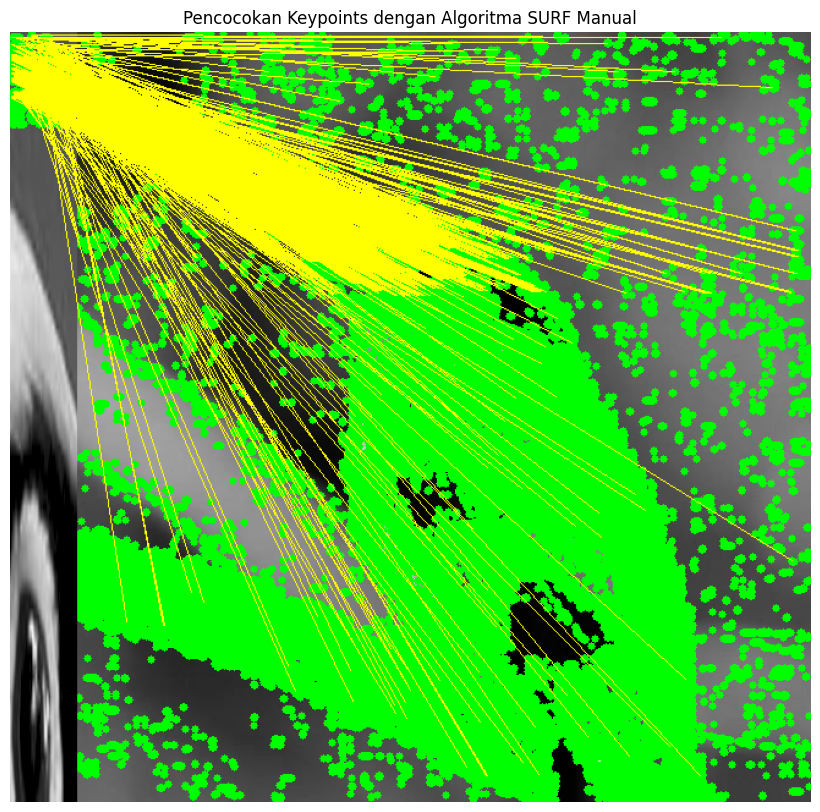

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_laplace, rotate
import matplotlib.pyplot as plt

def integral_image(image):
    """ Menghitung gambar integral untuk mempercepat komputasi area. """
    return image.cumsum(axis=0).cumsum(axis=1)

def detect_keypoints(image, hessian_threshold=100):
    """ Deteksi titik kunci menggunakan filter Hessian Laplace. """
    # Gunakan Laplacian Gaussian (LoG) untuk deteksi titik kunci.
    hessian_response = gaussian_laplace(image, sigma=1)

    # Temukan maksimum lokal pada gambar hasil LoG
    keypoints = []
    for i in range(1, hessian_response.shape[0] - 1):
        for j in range(1, hessian_response.shape[1] - 1):
            if hessian_response[i, j] > hessian_threshold:
                keypoints.append((i, j))

    return keypoints

def compute_orientation(image, keypoints):
    """ Tentukan orientasi dari setiap titik kunci. """
    orientations = []
    for kp in keypoints:
        x, y = kp
        # Pastikan patch tidak keluar dari batas gambar
        if x > 5 and x < image.shape[0] - 5 and y > 5 and y < image.shape[1] - 5:
            patch = image[x-5:x+5, y-5:y+5]  # Ambil patch kecil di sekitar titik kunci
            gradient_x = cv2.Sobel(patch, cv2.CV_64F, 1, 0, ksize=3)
            gradient_y = cv2.Sobel(patch, cv2.CV_64F, 0, 1, ksize=3)
            orientation = np.arctan2(gradient_y.mean(), gradient_x.mean())
            orientations.append((kp, orientation))  # Simpan orientasi dan titik kunci
    return orientations

def compute_descriptors(image, keypoints_with_orientations):
    """ Bangun deskriptor untuk setiap titik kunci berdasarkan orientasi. """
    descriptors = []
    for kp, orientation in keypoints_with_orientations:
        x, y = kp
        # Pastikan patch tidak keluar dari batas gambar
        if x > 8 and x < image.shape[0] - 8 and y > 8 and y < image.shape[1] - 8:
            patch = image[x-8:x+8, y-8:y+8]  # Ambil patch yang lebih besar di sekitar titik kunci
            # Rotasi patch berdasarkan orientasi titik kunci
            patch_rotated = rotate(patch, np.degrees(orientation))
            # Gunakan sub-region grid untuk membangun deskriptor (simulasi Haar wavelet)
            descriptor = []
            for i in range(0, 16, 4):
                for j in range(0, 16, 4):
                    sub_patch = patch_rotated[i:i+4, j:j+4]
                    dx = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 1, 0, ksize=3))
                    dy = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 0, 1, ksize=3))
                    descriptor.extend([dx, dy])
            descriptors.append(np.array(descriptor))
    return descriptors

def match_descriptors(desc1, desc2):
    """ Mencocokkan deskriptor antara dua gambar menggunakan Brute Force Matching. """
    matches = []
    for i, d1 in enumerate(desc1):
        distances = [np.linalg.norm(d1 - d2) for d2 in desc2]
        best_match = np.argmin(distances)
        matches.append((i, best_match))
    return matches

def surf_algorithm(img1, img2):
    """ Algoritma SURF manual """
    # 1. Interest Point Detection
    keypoints1 = detect_keypoints(img1)
    keypoints2 = detect_keypoints(img2)

    # 2. Orientation Assignment
    keypoints_with_orientations1 = compute_orientation(img1, keypoints1)
    keypoints_with_orientations2 = compute_orientation(img2, keypoints2)

    # 3. Keypoint Descriptor
    descriptors1 = compute_descriptors(img1, keypoints_with_orientations1)
    descriptors2 = compute_descriptors(img2, keypoints_with_orientations2)

    # 4. Keypoint Matching
    matches = match_descriptors(descriptors1, descriptors2)

    return keypoints1, keypoints2, matches

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Path gambar pertama
img2_path = '/content/unnamed.jpg'  # Path gambar kedua

# Load gambar dalam mode grayscale
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Pastikan gambar terbaca dengan benar
if img1 is None or img2 is None:
    raise ValueError("Salah satu gambar tidak ditemukan, cek kembali path-nya.")

# Jalankan algoritma SURF manual
keypoints1, keypoints2, matches = surf_algorithm(img1, img2)

# Visualisasi hasil pencocokan keypoints
print("Pencocokan keypoints selesai.")

# Visualisasi menggunakan matplotlib
def draw_keypoints(img, keypoints, color=(0, 255, 0)):
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for kp in keypoints:
        x, y = kp
        cv2.circle(img_color, (y, x), 3, color, -1)
    return img_color

def draw_matches(img1, img2, keypoints1, keypoints2, matches):
    # Menghitung tinggi gambar maksimum
    height1, width1 = img1.shape
    height2, width2 = img2.shape
    max_height = max(height1, height2)

    # Menyesuaikan tinggi gambar untuk penggabungan
    img1_resized = cv2.resize(img1, (width1, max_height))
    img2_resized = cv2.resize(img2, (width2, max_height))

    img1_color = draw_keypoints(img1_resized, keypoints1)
    img2_color = draw_keypoints(img2_resized, keypoints2)

    combined_img = np.hstack((img1_color, img2_color))
    for m in matches:
        pt1 = keypoints1[m[0]]
        pt2 = keypoints2[m[1]]
        pt2 = (pt2[1] + img1_color.shape[1], pt2[0])
        cv2.line(combined_img, (pt1[1], pt1[0]), pt2, (0, 255, 255), 1)

    return combined_img

# Gambar hasil pencocokan
matched_img = draw_matches(img1, img2, keypoints1, keypoints2, matches)

# Tampilkan hasil pencocokan
plt.figure(figsize=(15, 10))
plt.imshow(matched_img[..., ::-1])
plt.title('Pencocokan Keypoints dengan Algoritma SURF Manual')
plt.axis('off')
plt.show()


Pencocokan keypoints selesai.


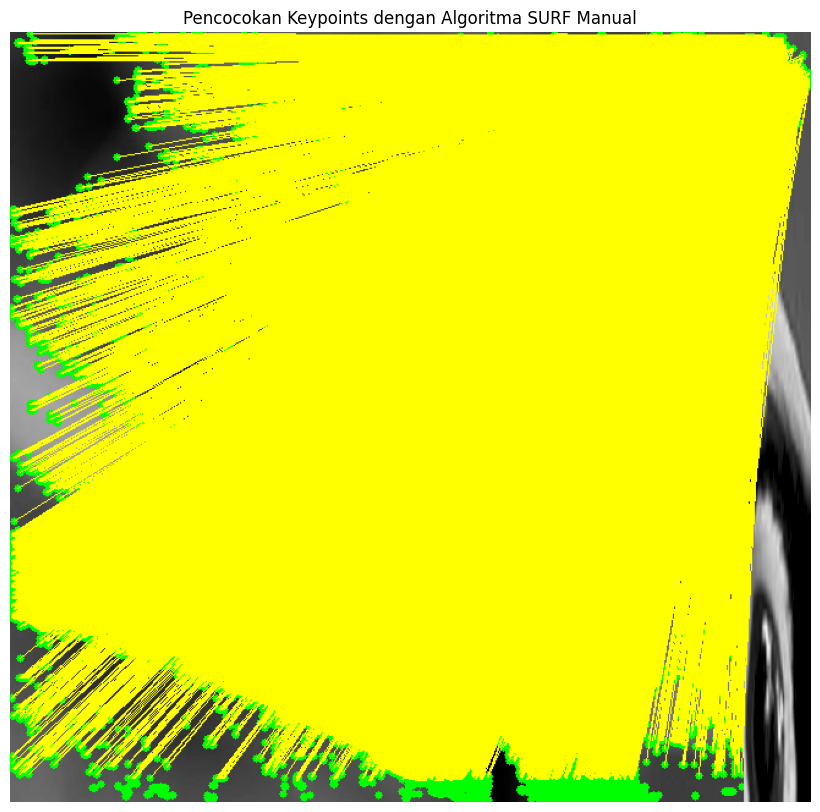

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_laplace, rotate
import matplotlib.pyplot as plt

def integral_image(image):
    """ Menghitung gambar integral untuk mempercepat komputasi area. """
    return image.cumsum(axis=0).cumsum(axis=1)

def detect_keypoints(image, hessian_threshold=100):
    """ Deteksi titik kunci menggunakan filter Hessian Laplace. """
    # Gunakan Laplacian Gaussian (LoG) untuk deteksi titik kunci.
    hessian_response = gaussian_laplace(image, sigma=1)

    # Temukan maksimum lokal pada gambar hasil LoG
    keypoints = []
    for i in range(1, hessian_response.shape[0] - 1):
        for j in range(1, hessian_response.shape[1] - 1):
            if hessian_response[i, j] > hessian_threshold:
                keypoints.append((i, j))

    return keypoints

def compute_orientation(image, keypoints):
    """ Tentukan orientasi dari setiap titik kunci. """
    orientations = []
    for kp in keypoints:
        x, y = kp
        # Pastikan patch tidak keluar dari batas gambar
        if x > 5 and x < image.shape[0] - 5 and y > 5 and y < image.shape[1] - 5:
            patch = image[x-5:x+5, y-5:y+5]  # Ambil patch kecil di sekitar titik kunci
            gradient_x = cv2.Sobel(patch, cv2.CV_64F, 1, 0, ksize=3)
            gradient_y = cv2.Sobel(patch, cv2.CV_64F, 0, 1, ksize=3)
            orientation = np.arctan2(gradient_y.mean(), gradient_x.mean())
            orientations.append((kp, orientation))  # Simpan orientasi dan titik kunci
    return orientations

def compute_descriptors(image, keypoints_with_orientations):
    """ Bangun deskriptor untuk setiap titik kunci berdasarkan orientasi. """
    descriptors = []
    for kp, orientation in keypoints_with_orientations:
        x, y = kp
        # Pastikan patch tidak keluar dari batas gambar
        if x > 8 and x < image.shape[0] - 8 and y > 8 and y < image.shape[1] - 8:
            patch = image[x-8:x+8, y-8:y+8]  # Ambil patch yang lebih besar di sekitar titik kunci
            # Rotasi patch berdasarkan orientasi titik kunci
            patch_rotated = rotate(patch, np.degrees(orientation))
            # Gunakan sub-region grid untuk membangun deskriptor (simulasi Haar wavelet)
            descriptor = []
            for i in range(0, 16, 4):
                for j in range(0, 16, 4):
                    sub_patch = patch_rotated[i:i+4, j:j+4]
                    dx = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 1, 0, ksize=3))
                    dy = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 0, 1, ksize=3))
                    descriptor.extend([dx, dy])
            descriptors.append(np.array(descriptor))
    return descriptors

def match_descriptors(desc1, desc2):
    """ Mencocokkan deskriptor antara dua gambar menggunakan Brute Force Matching. """
    matches = []
    for i, d1 in enumerate(desc1):
        distances = [np.linalg.norm(d1 - d2) for d2 in desc2]
        best_match = np.argmin(distances)
        matches.append((i, best_match))
    return matches

def surf_algorithm(img1, img2):
    """ Algoritma SURF manual """
    # 1. Interest Point Detection
    keypoints1 = detect_keypoints(img1)
    keypoints2 = detect_keypoints(img2)

    # 2. Orientation Assignment
    keypoints_with_orientations1 = compute_orientation(img1, keypoints1)
    keypoints_with_orientations2 = compute_orientation(img2, keypoints2)

    # 3. Keypoint Descriptor
    descriptors1 = compute_descriptors(img1, keypoints_with_orientations1)
    descriptors2 = compute_descriptors(img2, keypoints_with_orientations2)

    # 4. Keypoint Matching
    matches = match_descriptors(descriptors1, descriptors2)

    return keypoints1, keypoints2, matches

# Uji fungsi dengan dua gambar
img1_path = '/content/unnamed.jpg'  # Path gambar pertama
img2_path = '/content/Cuplikan layar 2024-10-10 222221.png' # Path gambar kedua

# Load gambar dalam mode grayscale
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Pastikan gambar terbaca dengan benar
if img1 is None or img2 is None:
    raise ValueError("Salah satu gambar tidak ditemukan, cek kembali path-nya.")

# Jalankan algoritma SURF manual
keypoints1, keypoints2, matches = surf_algorithm(img1, img2)

# Visualisasi hasil pencocokan keypoints
print("Pencocokan keypoints selesai.")

# Visualisasi menggunakan matplotlib
def draw_keypoints(img, keypoints, color=(0, 255, 0)):
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for kp in keypoints:
        x, y = kp
        cv2.circle(img_color, (y, x), 3, color, -1)
    return img_color

def draw_matches(img1, img2, keypoints1, keypoints2, matches):
    # Menghitung tinggi gambar maksimum
    height1, width1 = img1.shape
    height2, width2 = img2.shape
    max_height = max(height1, height2)

    # Menyesuaikan tinggi gambar untuk penggabungan
    img1_resized = cv2.resize(img1, (width1, max_height))
    img2_resized = cv2.resize(img2, (width2, max_height))

    img1_color = draw_keypoints(img1_resized, keypoints1)
    img2_color = draw_keypoints(img2_resized, keypoints2)

    combined_img = np.hstack((img1_color, img2_color))
    for m in matches:
        pt1 = keypoints1[m[0]]
        pt2 = keypoints2[m[1]]
        pt2 = (pt2[1] + img1_color.shape[1], pt2[0])
        cv2.line(combined_img, (pt1[1], pt1[0]), pt2, (0, 255, 255), 1)

    return combined_img

# Gambar hasil pencocokan
matched_img = draw_matches(img1, img2, keypoints1, keypoints2, matches)

# Tampilkan hasil pencocokan
plt.figure(figsize=(15, 10))
plt.imshow(matched_img[..., ::-1])
plt.title('Pencocokan Keypoints dengan Algoritma SURF Manual')
plt.axis('off')
plt.show()


Pencocokan keypoints selesai.


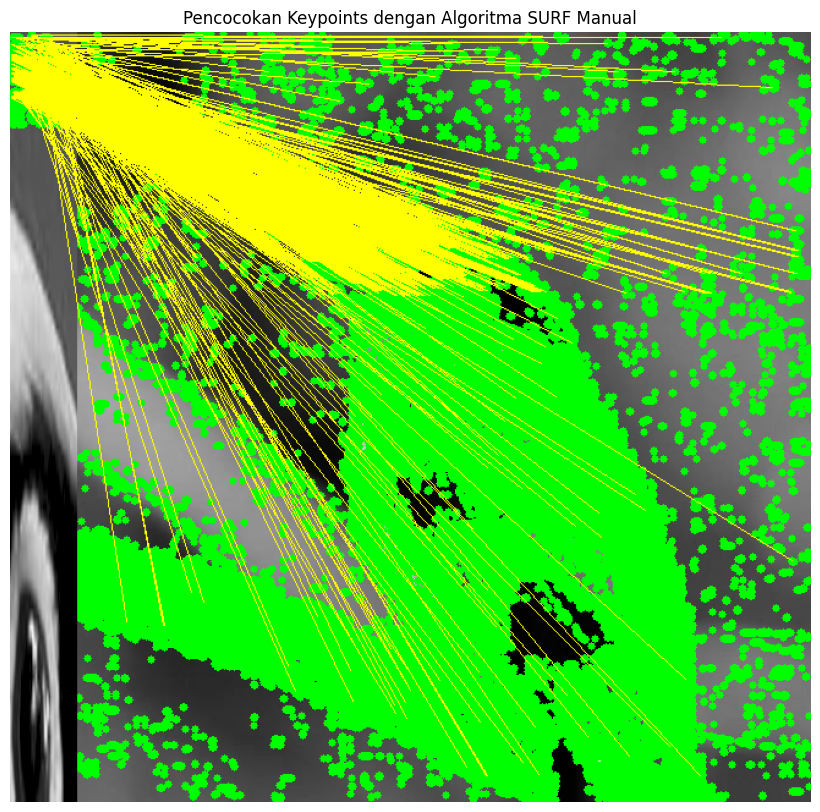

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_laplace
import matplotlib.pyplot as plt

def integral_image(image):
    """Menghitung gambar integral untuk mempercepat komputasi area."""
    return image.cumsum(axis=0).cumsum(axis=1)

def detect_keypoints(image, hessian_threshold=100):
    """Deteksi titik kunci menggunakan filter Hessian Laplace."""
    hessian_response = gaussian_laplace(image, sigma=1)
    keypoints = []
    for i in range(1, hessian_response.shape[0] - 1):
        for j in range(1, hessian_response.shape[1] - 1):
            if hessian_response[i, j] > hessian_threshold:
                keypoints.append((i, j))
    return keypoints

def compute_orientation(image, keypoints):
    """Tentukan orientasi dari setiap titik kunci."""
    orientations = []
    for kp in keypoints:
        x, y = kp
        if x > 5 and x < image.shape[0] - 5 and y > 5 and y < image.shape[1] - 5:
            patch = image[x-5:x+5, y-5:y+5]
            gradient_x = cv2.Sobel(patch, cv2.CV_64F, 1, 0, ksize=3)
            gradient_y = cv2.Sobel(patch, cv2.CV_64F, 0, 1, ksize=3)
            orientation = np.arctan2(gradient_y.mean(), gradient_x.mean())
            orientations.append((kp, orientation))
    return orientations

def compute_descriptors(image, keypoints_with_orientations):
    """Bangun deskriptor untuk setiap titik kunci berdasarkan orientasi."""
    descriptors = []
    for kp, orientation in keypoints_with_orientations:
        x, y = kp
        if x > 8 and x < image.shape[0] - 8 and y > 8 and y < image.shape[1] - 8:
            patch = image[x-8:x+8, y-8:y+8]
            patch_rotated = rotate(patch, np.degrees(orientation))
            descriptor = []
            for i in range(0, 16, 4):
                for j in range(0, 16, 4):
                    sub_patch = patch_rotated[i:i+4, j:j+4]
                    dx = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 1, 0, ksize=3))
                    dy = np.sum(cv2.Sobel(sub_patch, cv2.CV_64F, 0, 1, ksize=3))
                    descriptor.extend([dx, dy])
            descriptors.append(np.array(descriptor))
    return descriptors

def match_descriptors(desc1, desc2):
    """Mencocokkan deskriptor antara dua gambar menggunakan Brute Force Matching."""
    matches = []
    for i, d1 in enumerate(desc1):
        distances = [np.linalg.norm(d1 - d2) for d2 in desc2]
        best_match = np.argmin(distances)
        matches.append((i, best_match))
    return matches

def surf_algorithm(img1, img2):
    """Algoritma SURF manual"""
    # 1. Interest Point Detection
    keypoints1 = detect_keypoints(img1)
    keypoints2 = detect_keypoints(img2)

    # 2. Orientation Assignment
    keypoints_with_orientations1 = compute_orientation(img1, keypoints1)
    keypoints_with_orientations2 = compute_orientation(img2, keypoints2)

    # 3. Keypoint Descriptor
    descriptors1 = compute_descriptors(img1, keypoints_with_orientations1)
    descriptors2 = compute_descriptors(img2, keypoints_with_orientations2)

    # 4. Keypoint Matching
    matches = match_descriptors(descriptors1, descriptors2)

    return keypoints1, keypoints2, matches

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Path gambar pertama
img2_path = '/content/unnamed.jpg'  # Path gambar kedua

# Load gambar dalam mode grayscale
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Pastikan gambar terbaca dengan benar
if img1 is None or img2 is None:
    raise ValueError("Salah satu gambar tidak ditemukan, cek kembali path-nya.")

# Jalankan algoritma SURF manual
keypoints1, keypoints2, matches = surf_algorithm(img1, img2)

# Visualisasi hasil pencocokan keypoints
print("Pencocokan keypoints selesai.")

# Visualisasi menggunakan matplotlib
def draw_keypoints(img, keypoints, color=(0, 255, 0)):
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for kp in keypoints:
        x, y = kp
        cv2.circle(img_color, (y, x), 3, color, -1)
    return img_color

def draw_matches(img1, img2, keypoints1, keypoints2, matches):
    # Menghitung tinggi gambar maksimum
    height1, width1 = img1.shape
    height2, width2 = img2.shape
    max_height = max(height1, height2)

    # Menyesuaikan tinggi gambar untuk penggabungan
    img1_resized = cv2.resize(img1, (width1, max_height))
    img2_resized = cv2.resize(img2, (width2, max_height))

    img1_color = draw_keypoints(img1_resized, keypoints1)
    img2_color = draw_keypoints(img2_resized, keypoints2)

    combined_img = np.hstack((img1_color, img2_color))
    for m in matches:
        pt1 = keypoints1[m[0]]
        pt2 = keypoints2[m[1]]
        pt2 = (pt2[1] + img1_color.shape[1], pt2[0])
        cv2.line(combined_img, (pt1[1], pt1[0]), pt2, (0, 255, 255), 1)

    return combined_img

# Gambar hasil pencocokan
matched_img = draw_matches(img1, img2, keypoints1, keypoints2, matches)

# Tampilkan hasil pencocokan
plt.figure(figsize=(15, 10))
plt.imshow(matched_img[..., ::-1])
plt.title('Pencocokan Keypoints dengan Algoritma SURF Manual')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk menghitung gambar integral
def integral_image(img):
    rows, cols = img.shape
    integral = np.zeros((rows+1, cols+1), dtype=np.float32)
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            integral[i, j] = img[i-1, j-1] + integral[i-1, j] + integral[i, j-1] - integral[i-1, j-1]
    return integral

# Fungsi untuk membangun matriks Hessian
def hessian_matrix(integral_img, x, y, size):
    Dxx = integral_img[y+size, x+size] - 2 * integral_img[y, x+size] + integral_img[y-size, x+size]
    Dyy = integral_img[y+size, x+size] - 2 * integral_img[y+size, x] + integral_img[y+size, x-size]
    Dxy = integral_img[y+size, x+size] - integral_img[y-size, x+size] - integral_img[y+size, x-size] + integral_img[y-size, x-size]
    return Dxx * Dyy - (0.9 * Dxy)**2  # Approximation of determinant

# Fungsi untuk mendeteksi keypoints
def detect_keypoints(integral_img, threshold=10000):
    keypoints = []
    rows, cols = integral_img.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if hessian_matrix(integral_img, j, i, 1) > threshold:
                keypoints.append((i, j))
    return keypoints

# Fungsi untuk mencocokkan keypoints (matching keypoints) antar dua gambar
def match_keypoints(kp1, kp2, desc1, desc2):
    matches = []
    for i in range(len(kp1)):
        best_match = None
        best_distance = float('inf')
        for j in range(len(kp2)):
            dist = np.linalg.norm(desc1[i] - desc2[j])
            if dist < best_distance:
                best_distance = dist
                best_match = j
        matches.append((i, best_match))
    return matches

# Membuat deskriptor sederhana (dummy descriptor)
def create_descriptor(img, keypoints):
    descriptors = []
    for kp in keypoints:
        patch = img[kp[0]-5:kp[0]+5, kp[1]-5:kp[1]+5].flatten()  # Ambil patch 10x10 sekitar keypoint
        descriptors.append(patch)
    return np.array(descriptors)

# Load gambar
img1 = '/content/Cuplikan layar 2024-10-10 222221.png'  # Path gambar pertama
img2 = '/content/unnamed.jpg'

# Buat gambar integral
integral_img1 = integral_image(img1)
integral_img2 = integral_image(img2)

# Deteksi keypoints
keypoints1 = detect_keypoints(integral_img1)
keypoints2 = detect_keypoints(integral_img2)

# Buat deskriptor sederhana
desc1 = create_descriptor(img1, keypoints1)
desc2 = create_descriptor(img2, keypoints2)

# Matching keypoints
matches = match_keypoints(keypoints1, keypoints2, desc1, desc2)

# Visualisasi hasil matching
img1_kp = img1.copy()
img2_kp = img2.copy()
for kp in keypoints1:
    cv2.circle(img1_kp, (kp[1], kp[0]), 3, (0, 255, 0), -1)
for kp in keypoints2:
    cv2.circle(img2_kp, (kp[1], kp[0]), 3, (0, 255, 0), -1)

# Gabungkan gambar untuk visualisasi
height = max(img1.shape[0], img2.shape[0])
combined_img = np.zeros((height, img1.shape[1] + img2.shape[1]), dtype=np.uint8)
combined_img[:img1.shape[0], :img1.shape[1]] = img1_kp
combined_img[:img2.shape[0], img1.shape[1]:] = img2_kp

# Gambar garis matching
for m in matches:
    pt1 = keypoints1[m[0]]
    pt2 = keypoints2[m[1]]
    pt2 = (pt2[1] + img1.shape[1], pt2[0])
    cv2.line(combined_img, (pt1[1], pt1[0]), pt2, (255, 0, 0), 1)

# Tampilkan gambar
plt.imshow(combined_img, cmap='gray')
plt.title('SURF Keypoint Matching')
plt.show()


AttributeError: 'str' object has no attribute 'shape'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk menghitung gambar integral
def integral_image(img):
    rows, cols = img.shape
    integral = np.zeros((rows+1, cols+1), dtype=np.float32)
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            integral[i, j] = img[i-1, j-1] + integral[i-1, j] + integral[i, j-1] - integral[i-1, j-1]
    return integral

# Fungsi untuk membangun matriks Hessian
def hessian_matrix(integral_img, x, y, size):
    Dxx = integral_img[y+size, x+size] - 2 * integral_img[y, x+size] + integral_img[y-size, x+size]
    Dyy = integral_img[y+size, x+size] - 2 * integral_img[y+size, x] + integral_img[y+size, x-size]
    Dxy = integral_img[y+size, x+size] - integral_img[y-size, x+size] - integral_img[y+size, x-size] + integral_img[y-size, x-size]
    return Dxx * Dyy - (0.9 * Dxy)**2  # Approximation of determinant

# Fungsi untuk mendeteksi keypoints
def detect_keypoints(integral_img, threshold=10000):
    keypoints = []
    rows, cols = integral_img.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if hessian_matrix(integral_img, j, i, 1) > threshold:
                keypoints.append((i, j))
    return keypoints

# Fungsi untuk mencocokkan keypoints (matching keypoints) antar dua gambar
def match_keypoints(kp1, kp2, desc1, desc2):
    matches = []
    for i in range(len(kp1)):
        best_match = None
        best_distance = float('inf')
        for j in range(len(kp2)):
            dist = np.linalg.norm(desc1[i] - desc2[j])
            if dist < best_distance:
                best_distance = dist
                best_match = j
        matches.append((i, best_match))
    return matches

# Membuat deskriptor sederhana (dummy descriptor)
def create_descriptor(img, keypoints):
    descriptors = []
    for kp in keypoints:
        patch = img[kp[0]-5:kp[0]+5, kp[1]-5:kp[1]+5].flatten()  # Ambil patch 10x10 sekitar keypoint
        descriptors.append(patch)
    return np.array(descriptors)

# Load gambar menggunakan cv2.imread
img1 = cv2.imread('/content/Cuplikan layar 2024-10-10 222221.png', 0)  # Pastikan format grayscale (0)
img2 = cv2.imread('/content/unnamed.jpg', 0)


# Periksa apakah gambar berhasil di-load
if img1 is None or img2 is None:
    print("Gambar tidak ditemukan atau tidak bisa di-load")
else:
    # Buat gambar integral
    integral_img1 = integral_image(img1)
    integral_img2 = integral_image(img2)

    # Deteksi keypoints
    keypoints1 = detect_keypoints(integral_img1)
    keypoints2 = detect_keypoints(integral_img2)

    # Buat deskriptor sederhana
    desc1 = create_descriptor(img1, keypoints1)
    desc2 = create_descriptor(img2, keypoints2)

    # Matching keypoints
    matches = match_keypoints(keypoints1, keypoints2, desc1, desc2)

    # Visualisasi hasil matching
    img1_kp = img1.copy()
    img2_kp = img2.copy()
    for kp in keypoints1:
        cv2.circle(img1_kp, (kp[1], kp[0]), 3, (0, 255, 0), -1)
    for kp in keypoints2:
        cv2.circle(img2_kp, (kp[1], kp[0]), 3, (0, 255, 0), -1)

    # Gabungkan gambar untuk visualisasi
    height = max(img1.shape[0], img2.shape[0])
    combined_img = np.zeros((height, img1.shape[1] + img2.shape[1]), dtype=np.uint8)
    combined_img[:img1.shape[0], :img1.shape[1]] = img1_kp
    combined_img[:img2.shape[0], img1.shape[1]:] = img2_kp

    # Gambar garis matching
    for m in matches:
        pt1 = keypoints1[m[0]]
        pt2 = keypoints2[m[1]]
        pt2 = (pt2[1] + img1.shape[1], pt2[0])
        cv2.line(combined_img, (pt1[1], pt1[0]), pt2, (255, 0, 0), 1)

    # Tampilkan gambar
    plt.imshow(combined_img, cmap='gray')
    plt.title('SURF Keypoint Matching')
    plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (223,) + inhomogeneous part.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Google Colab
import matplotlib.pyplot as plt

# Fungsi untuk menghitung gambar integral
def integral_image(img):
    rows, cols = img.shape
    integral = np.zeros((rows+1, cols+1), dtype=np.float32)
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            integral[i, j] = img[i-1, j-1] + integral[i-1, j] + integral[i, j-1] - integral[i-1, j-1]
    return integral

# Fungsi untuk membangun matriks Hessian
def hessian_matrix(integral_img, x, y, size):
    Dxx = integral_img[y+size, x+size] - 2 * integral_img[y, x+size] + integral_img[y-size, x+size]
    Dyy = integral_img[y+size, x+size] - 2 * integral_img[y+size, x] + integral_img[y+size, x-size]
    Dxy = integral_img[y+size, x+size] - integral_img[y-size, x+size] - integral_img[y+size, x-size] + integral_img[y-size, x-size]
    return Dxx * Dyy - (0.9 * Dxy)**2  # Approximation of determinant

# Fungsi untuk mendeteksi keypoints
def detect_keypoints(integral_img, threshold=10000):
    keypoints = []
    rows, cols = integral_img.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if hessian_matrix(integral_img, j, i, 1) > threshold:
                keypoints.append((i, j))
    return keypoints

# Fungsi untuk mencocokkan keypoints antar dua gambar
def match_keypoints(kp1, kp2, desc1, desc2):
    matches = []
    for i in range(len(kp1)):
        best_match = None
        best_distance = float('inf')
        for j in range(len(kp2)):
            dist = np.linalg.norm(desc1[i] - desc2[j])
            if dist < best_distance:
                best_distance = dist
                best_match = j
        matches.append((i, best_match))
    return matches

# Membuat deskriptor sederhana (dummy descriptor)
def create_descriptor(img, keypoints):
    descriptors = []
    for kp in keypoints:
        patch = img[kp[0]-5:kp[0]+5, kp[1]-5:kp[1]+5].flatten()  # Ambil patch 10x10 sekitar keypoint
        descriptors.append(patch)
    return np.array(descriptors)

# Fungsi utama untuk mencocokkan fitur berdasarkan SURF manual
def match_features_surf_manual(img1_path, img2_path):
    # Membaca dua gambar
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Periksa apakah gambar berhasil di-load
    if img1 is None or img2 is None:
        print("Gambar tidak ditemukan atau tidak bisa di-load")
        return

    # Buat gambar integral
    integral_img1 = integral_image(img1)
    integral_img2 = integral_image(img2)

    # Deteksi keypoints menggunakan deteksi Hessian
    keypoints1 = detect_keypoints(integral_img1)
    keypoints2 = detect_keypoints(integral_img2)

    # Buat deskriptor sederhana untuk keypoints
    desc1 = create_descriptor(img1, keypoints1)
    desc2 = create_descriptor(img2, keypoints2)

    # Matching keypoints antar dua gambar
    matches = match_keypoints(keypoints1, keypoints2, desc1, desc2)

    # Visualisasi hasil matching
    img1_kp = img1.copy()
    img2_kp = img2.copy()
    for kp in keypoints1:
        cv2.circle(img1_kp, (kp[1], kp[0]), 3, (0, 255, 0), -1)
    for kp in keypoints2:
        cv2.circle(img2_kp, (kp[1], kp[0]), 3, (0, 255, 0), -1)

    # Gabungkan gambar untuk visualisasi
    height = max(img1.shape[0], img2.shape[0])
    combined_img = np.zeros((height, img1.shape[1] + img2.shape[1]), dtype=np.uint8)
    combined_img[:img1.shape[0], :img1.shape[1]] = img1_kp
    combined_img[:img2.shape[0], img1.shape[1]:] = img2_kp

    # Gambar garis matching
    for m in matches:
        pt1 = keypoints1[m[0]]
        pt2 = keypoints2[m[1]]
        pt2 = (pt2[1] + img1.shape[1], pt2[0])
        cv2.line(combined_img, (pt1[1], pt1[0]), pt2, (255, 0, 0), 1)

    # Tampilkan gambar hasil matching
    plt.imshow(combined_img, cmap='gray')
    plt.title('SURF Keypoint Matching (Manual)')
    plt.show()

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Ganti dengan path gambar pertama
img2_path = '/content/unnamed.jpg'  # Ganti dengan path gambar kedua

# Panggil fungsi
match_features_surf_manual(img1_path, img2_path)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (223,) + inhomogeneous part.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

def detect_keypoints(img, threshold=100):
    """Deteksi keypoints menggunakan filter Hessian."""
    hessian_response = gaussian_laplace(img, sigma=1)
    keypoints = []
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if hessian_response[i, j] > threshold:
                keypoints.append((i, j))
    return keypoints

def create_descriptor(img, keypoints):
    """Buat deskriptor untuk setiap keypoint."""
    descriptors = []
    for kp in keypoints:
        x, y = kp
        # Pastikan patch berada dalam batas gambar
        if x >= 5 and x < img.shape[0] - 5 and y >= 5 and y < img.shape[1] - 5:
            patch = img[x-5:x+5, y-5:y+5].flatten()  # Ambil patch 10x10 sekitar keypoint
            descriptors.append(patch)
    # Mengembalikan deskriptor sebagai array 2D
    return np.array(descriptors)

def match_descriptors(desc1, desc2):
    """Cocokkan deskriptor menggunakan brute force matching."""
    matches = []
    for i, d1 in enumerate(desc1):
        distances = np.linalg.norm(d1 - desc2, axis=1)
        best_match_index = np.argmin(distances)
        matches.append((i, best_match_index))
    return matches

def draw_matches(img1, img2, keypoints1, keypoints2, matches):
    """Gambar hasil pencocokan keypoints."""
    img_combined = np.hstack((img1, img2))
    for match in matches:
        pt1 = keypoints1[match[0]]
        pt2 = keypoints2[match[1]]
        pt2_shifted = (pt2[1] + img1.shape[1], pt2[0])  # Geser koordinat pt2
        cv2.line(img_combined, (pt1[1], pt1[0]), pt2_shifted, (0, 255, 0), 1)
    return img_combined

def surf_algorithm(img1, img2):
    """Algoritma SURF manual."""
    # 1. Deteksi Keypoints
    keypoints1 = detect_keypoints(img1)
    keypoints2 = detect_keypoints(img2)

    # 2. Buat Deskriptor
    descriptors1 = create_descriptor(img1, keypoints1)
    descriptors2 = create_descriptor(img2, keypoints2)

    # 3. Pencocokan Deskriptor
    matches = match_descriptors(descriptors1, descriptors2)

    return keypoints1, keypoints2, matches

# Uji fungsi dengan dua gambar
img1_path = '/content/Cuplikan layar 2024-10-10 222221.png'  # Path gambar pertama
img2_path = '/content/unnamed.jpg'  # Path gambar kedua

# Load gambar dalam mode grayscale
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Pastikan gambar terbaca dengan benar
if img1 is None or img2 is None:
    raise ValueError("Salah satu gambar tidak ditemukan, cek kembali path-nya.")

# Jalankan algoritma SURF manual
keypoints1, keypoints2, matches = surf_algorithm(img1, img2)

# Visualisasi hasil pencocokan keypoints
matched_img = draw_matches(img1, img2, keypoints1, keypoints2, matches)

# Tampilkan hasil pencocokan
plt.figure(figsize=(15, 10))
plt.imshow(matched_img, cmap='gray')
plt.title('Pencocokan Keypoints dengan Algoritma SURF Manual')
plt.axis('off')
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 77 and the array at index 1 has size 630